# REGRESIÓN NO-LINEAL PYTHON

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importamos la base de datos del clima, la fecha lleva el nombre del mes-año en el que se registraron los datos
data = pd.read_csv('medio_ambiente.csv')

In [3]:
data.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2021/08/01,00:00,15.6,0.0,91,229,0.8
1,2021/08/01,01:00,15.7,0.0,90,210,1.5
2,2021/08/01,02:00,15.7,0.0,90,209,1.7
3,2021/08/01,03:00,15.3,0.0,90,209,2.3
4,2021/08/01,04:00,15.0,0.0,91,207,1.7


<AxesSubplot:xlabel='HUMEDAD (%)', ylabel='TEMPERATURA (°C)'>

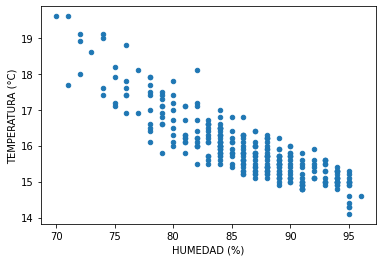

In [4]:
#visualizamos el tipo de tendencia que tienen los datos
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind='scatter',x='HUMEDAD (%)',y='TEMPERATURA (°C)')

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [6]:
#definimos las variables 
X = data['HUMEDAD (%)']
Y = data['TEMPERATURA (°C)']
X_data = X[:,np.newaxis] #cambiamos el tipo de los datos para su posterior análisis

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [7]:
print('tipo de dato de X: ',type(X))
print('Tipo de dato de X_data: ',type(X_data)) # que es lo que vamos a necesitar para que nuetra funcion trabaje correctamente

tipo de dato de X:  <class 'pandas.core.series.Series'>
Tipo de dato de X_data:  <class 'numpy.ndarray'>


In [8]:
#ajustamos la función con el método, analizando los datos con un polinomio de grado 2.
poly = PolynomialFeatures(degree=2)
X_new = poly.fit_transform(X_data)
lm = linear_model.LinearRegression()
lm.fit(X_new, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
lm.score(X_new,Y) # coeficiente de correlación

0.7915454058670611

In [10]:
lm.intercept_ # valor de intersección

61.180225912612904

In [11]:
lm.coef_ #coeficiente multiplicado a la variable

array([ 0.        , -0.9226568 ,  0.00459481])

Entonces vemos que el modelo se traduce en: Temperatura = 61.180225 - 0.9226568*humedad + 0.00459481*humedad^2

In [12]:
# ajuste de la función con polinomios de grado a definir
def regresion_validation(X,Y,Y_pred):
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X)-2))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print('error: '+str(error*100)+'%')
    print('-----------------------------------')

In [13]:
#se define el grado de los polinomios del grado 1 al grado 9
for d in range(1,10):
    poly = PolynomialFeatures(degree=d)
    X_new = poly.fit_transform(X_data)
    lm = linear_model.LinearRegression()
    lm.fit(X_new, Y)
    print('Regresion de grado '+str(d))
    print('R-cuadrado = '+str(lm.score(X_new,Y)))
    print('Interseccion = '+str(lm.intercept_))
    print('Coeficientes = '+str(lm.coef_))
    regresion_validation(X_new,Y,lm.predict(X_new))

Regresion de grado 1
R-cuadrado = 0.754004761273671
Interseccion = 28.33691569328881
Coeficientes = [ 0.         -0.14391502]
error: 2.8971751084000843%
-----------------------------------
Regresion de grado 2
R-cuadrado = 0.7915454058670611
Interseccion = 61.180225912612904
Coeficientes = [ 0.         -0.9226568   0.00459481]
error: 2.666963856526274%
-----------------------------------
Regresion de grado 3
R-cuadrado = 0.793550329221131
Interseccion = 154.73801772566307
Coeficientes = [ 0.00000000e+00 -4.28894038e+00  4.48040024e-02 -1.59464763e-04]
error: 2.654107393963697%
-----------------------------------
Regresion de grado 4
R-cuadrado = 0.7938670245126902
Interseccion = -322.88578225289194
Coeficientes = [ 0.00000000e+00  1.87753857e+01 -3.71523096e-01  3.17005253e-03
 -9.95456320e-06]
error: 2.6520709026746725%
-----------------------------------
Regresion de grado 5
R-cuadrado = 0.7942103178754686
Interseccion = 6039.724711721299
Coeficientes = [ 0.00000000e+00 -3.66592540e+

In [14]:
#grado que podría ser considerado el mejor
poly = PolynomialFeatures(degree=8)
X_new = poly.fit_transform(X_data)
lm = linear_model.LinearRegression()
lm.fit(X_new, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

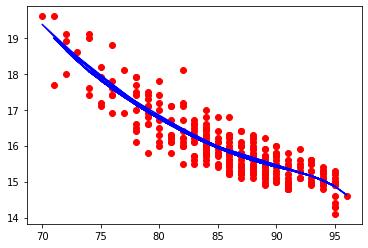

In [15]:
#visualización de la curva ajustada
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X_new),color='blue')